In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class SecondOrderODESolver:
    def __init__(self, coeff_a2, coeff_a1, coeff_a0, step_size, num_steps, x_initial, y_initial, yp_initial):
        self.coeff_a2 = coeff_a2
        self.coeff_a1 = coeff_a1
        self.coeff_a0 = coeff_a0
        self.step_size = step_size
        self.num_steps = num_steps
        self.x_initial = x_initial
        self.y_initial = y_initial
        self.yp_initial = yp_initial
        self.solution = np.zeros((num_steps, 3))
        self.solution[0] = [x_initial, y_initial, yp_initial]

    def finite_difference_method(self, x, y, y_prime_previous):
        return self.step_size / (self.coeff_a2(x) + self.coeff_a1(x) * self.step_size) * (-self.coeff_a0(x) * y + self.coeff_a2(x) / self.step_size * y_prime_previous)

    def solve_rk4(self):
        for i in range(1, self.num_steps):
            x, y, y_prime = self.solution[i-1]
            k1 = self.finite_difference_method(x, y, y_prime)
            k2 = self.finite_difference_method(x + self.step_size / 2, y + k1 * self.step_size / 2, y_prime)
            k3 = self.finite_difference_method(x + self.step_size / 2, y + k2 * self.step_size / 2, y_prime)
            k4 = self.finite_difference_method(x + self.step_size, y + k3 * self.step_size, y_prime)
            y_prime_average = (k1 + 2 * k2 + 2 * k3 + k4) / 6
            y_next = y + self.step_size * y_prime_average
            self.solution[i] = [x + self.step_size, y_next, y_prime_average]

    def plot_solution(self, exact_solution_function):
        x_values = np.arange(self.x_initial, self.step_size * self.num_steps, self.step_size)
        plt.plot(self.solution[:, 0], self.solution[:, 1], label='Approximate')
        plt.plot(x_values, exact_solution_function(x_values), label='Exact')
        plt.legend()
        plt.show()

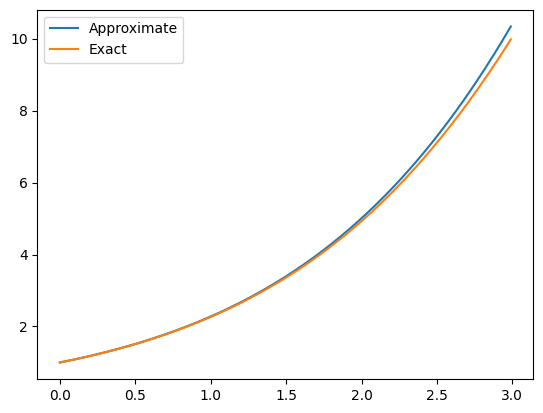

In [24]:
coeff_a2 = lambda x: 1
coeff_a1 = lambda x: -2
coeff_a0 = lambda x: 1

step_size = 1e-2
num_steps = 300
x_initial, y_initial, yp_initial = 0, 1, 5/6

exact_solution_function = lambda x: (1 - 1/6 * x) * np.exp(x)

solver = SecondOrderODESolver(coeff_a2, coeff_a1, coeff_a0, step_size, num_steps, x_initial, y_initial, yp_initial)

solver.solve_rk4()

solver.plot_solution(exact_solution_function)